# Cleaning and Preparing the data for model training

# Problem Statement

A retail company 'ABC Private Ltd' wants to understand the customer purchase behaviour (specifically purchase amount) against various products of categories. They have shared purchase summary pf various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city, type, current city), product details (id, category) and Total purchase amount from last month.

Now they want to build amodel to predict the purchase amount of cutomer against various products which will help to create personalized offer for customer against different products.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [159]:
# Importing Dataset

df_train = pd.read_csv('C:/Users/Satyam/Desktop/Data Science/Datasets/Black Friday/BlackFridayTrain.csv')
df_test = pd.read_csv('C:/Users/Satyam/Desktop/Data Science/Datasets/Black Friday/BlackFridayTest.csv')

In [160]:
df_test.shape

(233599, 11)

In [161]:
df_train.shape

(550068, 12)

In [162]:
# Merging train & test dataset one below another

df = df_train.append(df_test)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [164]:
# Removing unwanted features

df.drop(['User_ID'], axis=1, inplace=True)

In [165]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Converting categorical features into continuous features

In [166]:
# Gender--------

# Using 'map' function instead of 'get_dummies'.
# Can be done df['Gender']=pd.get_dummies(df['Gender'], drop_first=1)

df['Gender']=df['Gender'].map({'F':0,'M':1})


In [167]:
# Age---------

# We shall use 'map' function for atrget guiding

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [168]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [169]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [170]:
# City_Category--------

# We are using 'pd.get_dummies'

df_city = pd.get_dummies(df['City_Category'], drop_first=True)

In [171]:
df = pd.concat([df,df_city],axis=1)

In [172]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [173]:
# Dropping city_category

df.drop('City_Category', axis=1, inplace=True)

In [174]:
# Stay_In_Current_City_Years ------

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [175]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'2':2, '4+':4, '3':3, '1':1, '0': 0})

In [143]:
# We can also replace/ remove '+' as below

# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

# Then convert data type into Int

# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)


# Handle Missing Values

In [177]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [178]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [179]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [180]:
# Here we observed 'Product Category' is discrete variable.
# We will fill in Nan values by 'mode' here.

# When we code 'df['Product_Category_3'].mode()', we get output as in array format.
# Hence we use indexing here as 'df['Product_Category_3'].mode()[0]'

# Mode of 'Product_Category_2' is '8'.
# Mode of 'Product_Category_3' is '16'.


df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [181]:
df['Product_Category_3'].isnull().sum()

0

In [182]:
df['Product_Category_2'].isnull().sum()

0

In [183]:
# Converting feature B & C as 'int'.

df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6), object(1)
memory usage: 71.7+ MB


# Data Visualization

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

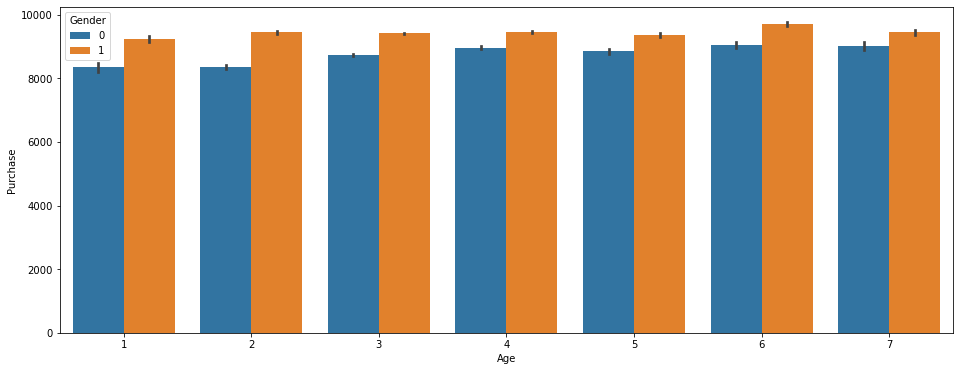

In [188]:
# Plotting Age vs Purchase barplot 

plt.rcParams['figure.figsize'] = (16,6)
sns.barplot('Age','Purchase',hue='Gender',data=df)

Observation: 
    
    1. Purchase done by Males is higher in all age categories as compare to Females.

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

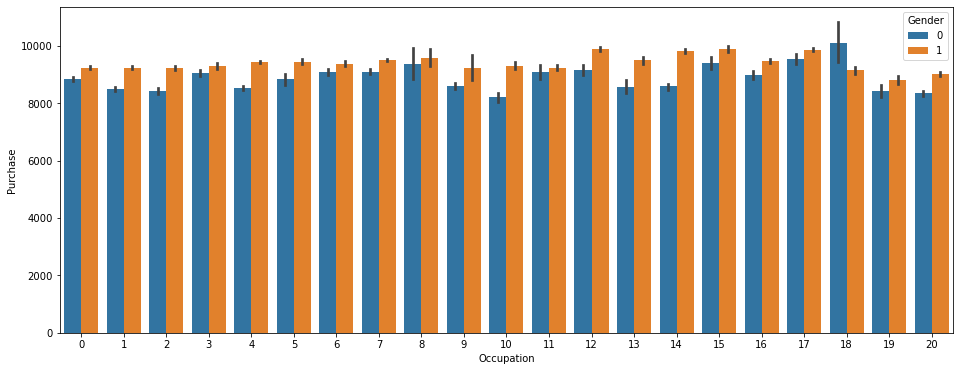

In [200]:
# Plotting Occupation vs Purchase barplot 

plt.rcParams['figure.figsize']=(16,6)
sns.barplot('Occupation','Purchase', hue='Gender', data=df)

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

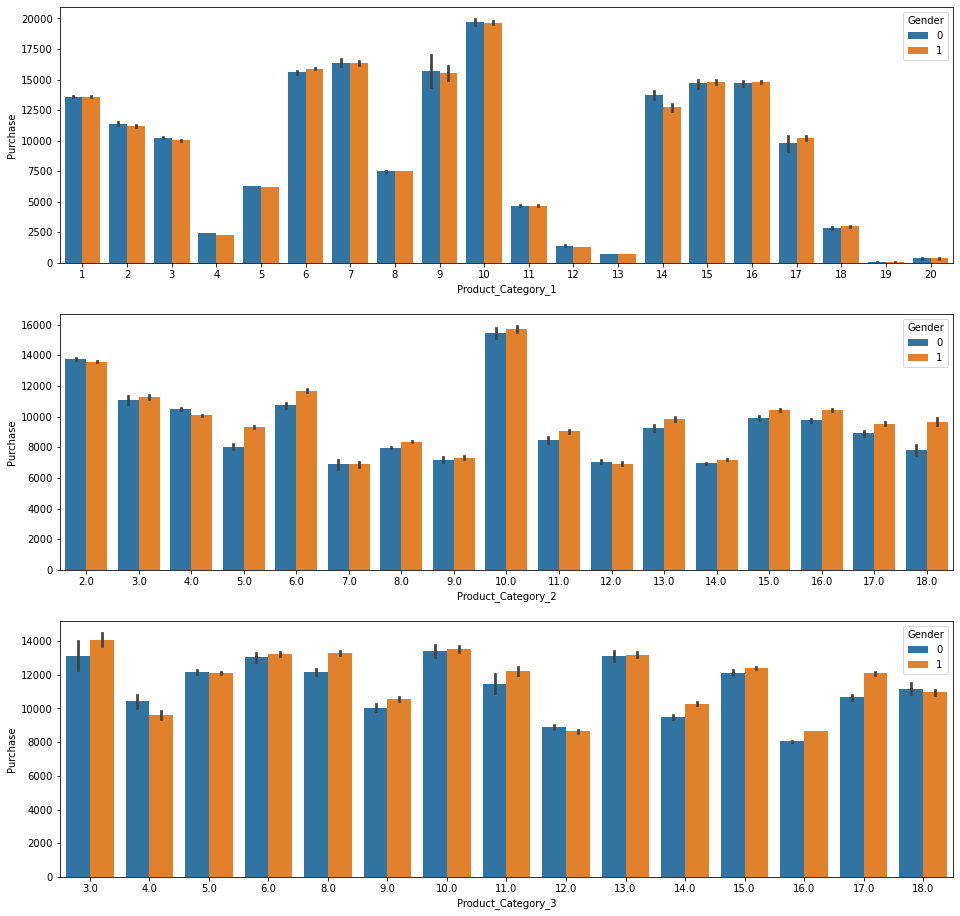

In [203]:
#Plotting 'Product Category vs Purchase' barplot

plt.rcParams['figure.figsize']=(16,16)
plt.subplot(3,1,1)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)
plt.subplot(3,1,2)
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)
plt.subplot(3,1,3)
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

Observation:
    
    1. Product no 10 has been purchased in high quantity by in both 'Product Category 1 & 2'.  

# Train_Test_Split

In [250]:
# Dividing train & test data Manually

train = df[df['Purchase'].notnull()]

test = df[df['Purchase'].isnull()] 

# We can also create test data as 'df[~df['Purchase'].isnull()]'. We used '~' tiled operator here.


In [257]:
x_train = train.drop(['Purchase','Product_ID'], axis=1)
x_test = test.drop(['Purchase','Product_ID'], axis=1)

In [278]:
y_train = train['Purchase']
y_test = test['Purchase']

# Feature Scaling

In [259]:
# importing standardscalar

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Creating Simple Linear Regression Model

In [279]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [280]:
Y_pred = model.predict(x_test)

In [291]:
#train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train, y_train, test_size=0.20)

In [292]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3570.2029873867687